Write a program to solve a Sudoku puzzle by filling the empty cells.

A sudoku solution must satisfy all of the following rules:

    Each of the digits 1-9 must occur exactly once in each row.
    Each of the digits 1-9 must occur exactly once in each column.
    Each of the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.

The '.' character indicates empty cells.

 

Example 1:

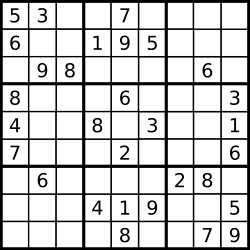

Input: board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
Output: [["5","3","4","6","7","8","9","1","2"],["6","7","2","1","9","5","3","4","8"],["1","9","8","3","4","2","5","6","7"],["8","5","9","7","6","1","4","2","3"],["4","2","6","8","5","3","7","9","1"],["7","1","3","9","2","4","8","5","6"],["9","6","1","5","3","7","2","8","4"],["2","8","7","4","1","9","6","3","5"],["3","4","5","2","8","6","1","7","9"]]
Explanation: The input board is shown above and the only valid solution is shown below:

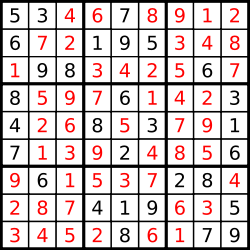
 

Constraints:

    board.length == 9
    board[i].length == 9
    board[i][j] is a digit or '.'.
    It is guaranteed that the input board has only one solution.



In [1]:
from typing import List

class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == '.':
                    for num in range(1, 10):
                        if self.checkValid(i, j, num, board):
                            board[i][j] = str(num)
                            if self.solveSudoku(board):
                                return True
                            else:
                                board[i][j] = '.'
                    return False
        return True
    
    def checkValid(self, row, col, num, board):
        for i in range(len(board)):
            if board[row][i] == str(num):
                return False
            if board[i][col] == str(num):
                return False
        
        row = row // 3
        col = col // 3
        for i in range(row * 3, row * 3 + 3):
            for j in range(col * 3, col * 3 + 3):
                if board[i][j] == str(num):
                    return False
        return True

In [2]:
from typing import List

class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        self.board = board
        self.rows = [set() for _ in range(9)]
        self.cols = [set() for _ in range(9)]
        self.sqrs = [set() for _ in range(9)]
        self.full_set = {str(num) for num in range(1, 10)}
        for r, row in enumerate(board):
            for c, num in enumerate(row):
                if num != '.':
                    self.rows[r].add(num)
                    self.cols[c].add(num)
                    self.sqrs[(r // 3) * 3 + c // 3].add(num)
        return self.backtrack()
        
    def backtrack(self):
        for r in range(9):
            for c in range(9):
                if self.board[r][c] == '.':
                    candidates = self.full_set - self.rows[r] - self.cols[c] - self.sqrs[(r // 3) * 3 + c // 3]
                    if not candidates:
                        return False
                    for num in candidates:
                        self.rows[r].add(num)
                        self.cols[c].add(num)
                        self.sqrs[(r // 3) * 3 + c // 3].add(num)
                        self.board[r][c] = num
                        if self.backtrack():
                            return True
                        self.rows[r].remove(num)
                        self.cols[c].remove(num)
                        self.sqrs[(r // 3) * 3 + c // 3].remove(num)
                        self.board[r][c] = '.'
                    return False
        return True


In [3]:
s = Solution()
s.solveSudoku([
    ["5","3",".",".","7",".",".",".","."],
    ["6",".",".","1","9","5",".",".","."],
    [".","9","8",".",".",".",".","6","."],
    ["8",".",".",".","6",".",".",".","3"],
    ["4",".",".","8",".","3",".",".","1"],
    ["7",".",".",".","2",".",".",".","6"],
    [".","6",".",".",".",".","2","8","."],
    [".",".",".","4","1","9",".",".","5"],
    [".",".",".",".","8",".",".","7","9"]] 
)

True